In [48]:
%matplotlib notebook
#The libraries we are going to use are PySerial and Time
# PySerial is encapsulates the access for the serial port.
import serial
import time
import numpy as np
# script that allow to set the graphs for the signal
#from graph import *
# Matplotlib to draw functions
import matplotlib.pyplot as plt
# To allow make live data graph we need drawnow
# pip install drawnow
# Librerias para graficar
from drawnow import *
from IPython import display
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
# Opening a Serial port

# - The port is immediately opened on object creation, when a port is given. It is not opened when
# port is None and a successive call to open() is required. port is a device name: depending on 
# operating system. e.g. /dev/ttyUSB0 on GNU/Linux or COM3 on Windows.
# - The parameter baudrate can be one of the standard values:  50, 75, 110, 134, 150, 200, 300, 600, 1200,
# 1800, 2400, 4800, 9600, 19200, 38400, 57600, 115200. These are well supported on all platforms.
# - Standard values above 115200, such as:  230400, 460800, 500000, 576000, 921600, 1000000, 1152000,
# 1500000, 2000000, 2500000, 3000000, 3500000, 4000000 also work on many platforms and devices.
# Non-standard values are also supported on some platforms (GNU/Linux, MAC OSX >= Tiger, Windows).
# - Possible values for the parameter timeout which controls the behavior of read():
# .. timeout = None: wait forever until requested number of bytes are received
# .. timeout = 0:  non-blocking mode, return immediately in any case, returning zero or more, up to
# the requested number of bytes
# .. timeout = x:  set timeout to x seconds (float allowed) returns immediately when the requested
# number of bytes are available, otherwise wait until the timeout expires and return all bytes that were
# received until then.
DEMOQE_read = serial.Serial('/dev/ttyUSB0',115200,timeout=1);
print(DEMOQE_read.isOpen())

SerialException: [Errno 2] could not open port /dev/ttyUSB0: [Errno 2] No such file or directory: '/dev/ttyUSB0'

In [7]:
# Set the matplotlib parameters, initializing
plt.ion() # Modo interactivo de matplotlib
# VARIABLES para almacenar los valores de los sensores en el tiempo
digital_1 = []
digital_2 = []
analogico_1 = []
analogico_2 = []
# Constantes de manipulacion para el main
flag_first_run = 0
flag_trama_len_cst = 0
list_pos_trama = []
i = 0
data_list =[]

In [8]:
#Hex to binary
def dec_to_bin(dec):
    dec_str = str(int(dec))
    cod_bin = bin(int(dec_str))
    return cod_bin

In [9]:
#Binary to decimal
def bin_to_dec(bina):
    cod_dec = int(str(bina),2)
    return cod_dec

In [10]:
# This function make possible to split an integer number to separate the information we want.
# First we have to translate the hexa code to binary. Second we save every bit following the
# protocol order:
# 0 D1 D2 A11 A10 A9 A8 A7
def decode_channel1_one(number):
    #decode Channel one
    part_one_bin = dec_to_bin(number)
    len_bit_number = len(part_one_bin) -2
    diferencia = 8 - len_bit_number
    cero_faltante = "0"*diferencia
    part_one_bin_comp = (cero_faltante + str(part_one_bin[2:]))
    digital_one = part_one_bin_comp[1]
    digital_two = part_one_bin_comp[2]
    analogic_most_significant = part_one_bin_comp[3:]
    return digital_one,digital_two,str(analogic_most_significant)

In [11]:
# This function make possible to split an integer number to separate the information we want.
# First we have to translate the hexa code to binary. Second we save every bit following the
# protocol order:
# 0 A6 A5 A4 A3 A2 A1 A0
def decode_channel12_two(number):
    #decode channe one and two for less significant bits
    part_one_bin = dec_to_bin(number)
    len_bit_number = len(part_one_bin) -2
    diferencia = 8 - len_bit_number
    cero_faltante = "0"*diferencia
    part_one_bin_comp = (cero_faltante + str(part_one_bin[2:]))
    analogic_less_significant = part_one_bin_comp[1:]
    return str(analogic_less_significant)

In [12]:
# This function make possible to split an integer number to separate the information we want.
# First we have to translate the hexa code to binary. Second we save every bit following the
# protocol order:
# 0 0 0 A11 A10 A9 A8 A7
def decode_channel2_one(number):
    # decode channel two for most significant bits
    part_one_bin = dec_to_bin(number)
    len_bit_number = len(part_one_bin) -2
    diferencia = 8 - len_bit_number
    cero_faltante = "0"*diferencia
    part_one_bin_comp = (cero_faltante + str(part_one_bin[2:]))
    analogic_most_significant = part_one_bin_comp[3:]
    return str(analogic_most_significant)

In [13]:
# We need to concatened the entirely analogic information.
def concatenation(string1,string2):
    return bin_to_dec(int(string1 + str(string2)))

In [14]:
def makeFig(): #Create a function that makes our desired plot
    plt.title('My Live Streaming Sensor Data')     
    plt.grid(True)                                  
    plt.ylabel('amplitud')                            
    plt.xlabel('time')
    plt.plot(analogico_1)       
    display.display(plt.gcf())
    display.clear_output(wait=True)

In [3]:
while True:
    try:
# To find the Serial port direction we can get the name typing python in the terminal:
# $ python -m serial.tools.list_ports -v
# NOTE: The microcontroller must be connected
        while (DEMOQE_read.inWaiting()==0):
            #print("No data in port")
            pass
        # Se recibiran 5 bytes por el puerto serial segun el protocolo
        #time.sleep(0.000001)
        #DEMOQE_read.flush()
        data_input_2 = DEMOQE_read.read(5)
        data_list.append(data_input_2)
        
    except:
        print("Keyboard interrupt")
        DEMOQE_read.close()
        break

Keyboard interrupt


NameError: name 'DEMOQE_read' is not defined

In [43]:
# PRUEBA
data_list =[b'\xf5\x1f\x7f\x1f\x7f'
,b'\n\x0c\xf5\x07\x16'
,b'\n\x03\xf5\x07\x17'
,b'\nn\xf5\x07\x17'
,b'\nh\xf5\x07\x17'
,b'\tg\xf5\x07\x17'
,b'\tO\xf5\x07\x18'
,b'\t/\xf5\x07\x18'
,b'\x08o\xf5\x07\x18'
,b'\x06#\x08\\\xf5'
,b'\x06\x1b\x070\xf5'
,b'\x06\x7f\x06{\xf5'
,b'\x05V\x06*\xf5'
,b'\x05>\x060\xf5'
,b'\x05,\x062\xf5'
,b'\nj\x0bt\xf5'
,b'\ni\x0b|\xf5'
,b'\nj\x0cz\xf5'
,b'\ni\x0b\x08\xf5'
,b'\nj\x0c\x07\xf5'
,b'\ni\x0c\x0c\xf5'
,b'\ni\x0c0\xf5'
,b'\xf5\nj\x0b\n'
,b'\xf5\nj\x0c\x16'
,b'\xf5\nj\x0c\x08'
,b'\xf5\ni\x0c#'
,b'\xf5\ni\x0cD'
,b'\xf5\nj\x0cm'
,b'\xf5\x12\x0c\x12\x16'
,b'\xf5\x12\x0c\x11d'
,b'\xf5\x12\x0c\x11P'
,b'\xf5\x12\x0b\x11['
,b'\xf5\x12\x0c\x12\x07'
,b'\x0e\xf5\x12&\x12'
,b'\x1a\xf5\x12&\x12'
,b'u\xf5\x12%\x13'
,b'3\xf5\x12&\x13'
,b'D\xf5\x12&\x13'
,b'\x18w\xf5\x17\x7f'
,b'\x17:\xf5\x17\x7f'
,b'\x17q\xf5\x17\x7f'
,b'\x161\xf5\x17\x7f'
,b'\x16+\xf5\x17\x7f'
,b'\x19\x1b\x18\x08\xf5'
,b'\x19\x1c\x18\x0c\xf5'
,b'\x19\x1b\x18\t\xf5'
,b'\x19\x1c\x17\x1b\xf5'
,b'\xf5\x1f\x7f\x1f\x7f'
,b'\n\x0c\xf5\x07\x16'
,b'\n\x03\xf5\x07\x17'
,b'\nn\xf5\x07\x17'
,b'\nh\xf5\x07\x17'
,b'\tg\xf5\x07\x17'
,b'\tO\xf5\x07\x18'
,b'\t/\xf5\x07\x18'
,b'\x08o\xf5\x07\x18'
,b'\x06#\x08\\\xf5'
,b'\x06\x1b\x070\xf5'
,b'\x06\x7f\x06{\xf5'
,b'\x05V\x06*\xf5'
,b'\x05>\x060\xf5'
,b'\x05,\x062\xf5'
,b'\nj\x0bt\xf5'
,b'\ni\x0b|\xf5'
,b'\nj\x0cz\xf5'
,b'\ni\x0b\x08\xf5'
,b'\nj\x0c\x07\xf5'
,b'\ni\x0c\x0c\xf5'
,b'\ni\x0c0\xf5'
,b'\xf5\nj\x0b\n'
,b'\xf5\nj\x0c\x16'
,b'\xf5\nj\x0c\x08']

In [44]:
flag_first_run = 0
for data_input in data_list:
    #Codigo 
    flag_trama_len_cst = 0
    list_pos_trama = []
    enc_posi = data_input.find(245)
    # Chequeo de encabezado en la primera casilla
    if enc_posi==0:
        flag_first_run=0
    # Longitud de la trama
    trama_length = len(data_input)
    if trama_length!=5:
        continue
    posiciones = trama_length - enc_posi -1
    # Chequeo de encabezado en su ultima casilla
    if posiciones==0:
        flag_first_run=1
    # Entrando formato de la primera corrida
    if (flag_first_run==0):
        for pos in range(posiciones):
            list_pos_trama.append(enc_posi +pos+1)
        for pos_dato_trama in list_pos_trama:
            if (pos_dato_trama == enc_posi +1):
                digital_one,digital_two,analogic_m_b = decode_channel1_one(data_input[pos_dato_trama])
                digital_1.append(digital_one)
                digital_2.append(digital_two)
                auxiliar = analogic_m_b
                flag_trama_len_cst += 1
            elif (pos_dato_trama == enc_posi + 2):
                analogic_l_b = decode_channel12_two(data_input[pos_dato_trama])
                analogico_1.append(concatenation(auxiliar,analogic_l_b))
                flag_trama_len_cst += 1
                if enc_posi==2:
                    flag_trama_len_cst=0
                    flag_first_run=1
            elif (pos_dato_trama == enc_posi + 3):
                if enc_posi==1:
                    flag_trama_len_cst=0
                    flag_first_run=1
                    analogic_l_b = decode_channel12_two(data_input[0])
                    analogico_2.append(concatenation(auxiliar2,analogic_l_b))
                analogic_m_b = decode_channel2_one(data_input[pos_dato_trama])
                auxiliar2 = analogic_m_b
                flag_trama_len_cst += 1
            elif (pos_dato_trama == enc_posi + 4):
                analogic_l_b = decode_channel12_two(data_input[pos_dato_trama])
                analogico_2.append(concatenation(auxiliar2,analogic_l_b))
                flag_trama_len_cst += 1
            else:
                flag_first_run=1
                if (flag_trama_len_cst == 4):
                    flag_trama_len_cst = 0
                    flag_first_run=0
    else:
        posiciones = trama_length - enc_posi -1
        # Verificar que llegaron los dos canales completos
        for pos_dato_trama in range(enc_posi):
            if (pos_dato_trama == enc_posi -1):
                analogic_l_b = decode_channel12_two(data_input[pos_dato_trama])
                analogico_2.append(concatenation(auxiliar2,analogic_l_b))
                flag_trama_len_cst += 1
                if enc_posi==1:
                    # Agregando la posicion 3 antes de salir
                    digital_one,digital_two,analogic_m_b = decode_channel1_one(data_input[2])
                    digital_1.append(digital_one)
                    digital_2.append(digital_two)
                    auxiliar = analogic_m_b
                    # Agregando la ultima posicion antes de salir
                    analogic_l_b = decode_channel12_two(data_input[3])
                    analogico_1.append(concatenation(auxiliar,analogic_l_b))
                    analogic_m_b = decode_channel2_one(data_input[4])
                    auxiliar2 = analogic_m_b
                    flag_first_run=1
                if enc_posi==2:
                    # Agregando la posicion 3 antes de salir
                    digital_one,digital_two,analogic_m_b = decode_channel1_one(data_input[3])
                    digital_1.append(digital_one)
                    digital_2.append(digital_two)
                    auxiliar = analogic_m_b
                    # Agregando la ultima posicion antes de salir
                    analogic_l_b = decode_channel12_two(data_input[4])
                    analogico_1.append(concatenation(auxiliar,analogic_l_b))
                    flag_first_run=1
            elif (pos_dato_trama == enc_posi -2):
                analogic_m_b = decode_channel2_one(data_input[pos_dato_trama])
                auxiliar2 = analogic_m_b
                flag_trama_len_cst += 1
            elif (pos_dato_trama == enc_posi -3):
                analogic_l_b = decode_channel12_two(data_input[pos_dato_trama])
                analogico_1.append(concatenation(auxiliar,analogic_l_b))
                flag_trama_len_cst += 1
            elif (pos_dato_trama == enc_posi -4):
                digital_one,digital_two,analogic_m_b = decode_channel1_one(data_input[pos_dato_trama])
                digital_1.append(digital_one)
                digital_2.append(digital_two)
                auxiliar = analogic_m_b
                flag_trama_len_cst += 1
            else:
                flag_trama_len_cst = 0
                flag_first_run = 0

In [45]:
print(analogico_1)

[4095, 918, 919, 919, 919, 919, 920, 920, 920, 803, 795, 895, 726, 702, 684, 1386, 1385, 1386, 1385, 1386, 1385, 1385, 1386, 1386, 1386, 1385, 1385, 1386, 2316, 2316, 2316, 2315, 2316, 2342, 2342, 2341, 2342, 2342, 3071, 3071, 3071, 3071, 3071, 3227, 3228, 3227, 3228, 4095, 918, 919, 919, 919, 919, 920, 920, 920, 803, 795, 895, 726, 702, 684, 1386, 1385, 1386, 1385, 1386, 1385, 1385, 1386, 1386, 1386, 4095, 918, 919, 919, 919, 919, 920, 920, 920, 803, 795, 895, 726, 702, 684, 1386, 1385, 1386, 1385, 1386, 1385, 1385, 1386, 1386, 1386, 1385, 1385, 1386, 2316, 2316, 2316, 2315, 2316, 2342, 2342, 2341, 2342, 2342, 3071, 3071, 3071, 3071, 3071, 3227, 3228, 3227, 3228, 4095, 918, 919, 919, 919, 919, 920, 920, 920, 803, 795, 895, 726, 702, 684, 1386, 1385, 1386, 1385, 1386, 1385, 1385, 1386, 1386, 1386, 4095, 918, 919, 919, 919, 919, 920, 920, 920, 803, 795, 895, 726, 702, 684, 1386, 1385, 1386, 1385, 1386, 1385, 1385, 1386, 1386, 1386, 1385, 1385, 1386, 2316, 2316, 2316, 2315, 2316, 2342, 2

<IPython.core.display.Javascript object>


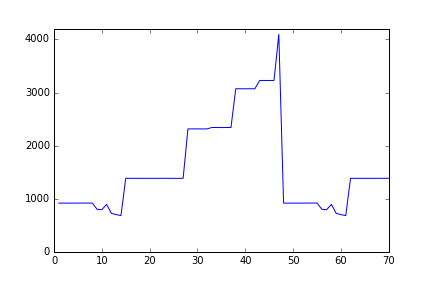

In [53]:
COUNT = 70
fig, ax = plt.subplots()
line, = ax.plot([], [])
ax.set_ylim([-1.5, 4200])
ax.set_xlim(0, COUNT)
xdata = []
ydata = [] 
def next():
    i = 0
    while i <= COUNT:
        i += 1
        yield i
def update(i):
    xdata.append(i)
    y = analogico_1[i]
    ydata.append(y)
    line.set_data(xdata, ydata)
    return line,
if __name__ == '__main__':
    a = animation.FuncAnimation(fig, update, next, blit = False, interval = 60,
                               repeat = False)
    #HTML(a.to_html5_video())